In [1]:
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

## <span style="color:Orange">Bayes' Rule</span>

$$ \Large
\boxed{
P(A\mid B) = P(B\mid A) \frac{P(A)}{P(B)}\; ,}
$$


So, $P(A\mid B) \ll P(B\mid A)$ when $P(A) \ll P(B)$. However, there is a [natural tendency](https://en.wikipedia.org/wiki/Confusion_of_the_inverse) to assume that $P(A\mid B) \simeq P(B\mid A)$ in informal reasoning, so be careful!

This relationship between $P(A\mid B)$ and $P(B\mid A)$ is known as **Bayes' rule**.  Although there is some controversy and debate surrounding *Bayesian statistics*, Bayes' rule follows directly from the definition of conditional probability and is firmly established.  (The Bayesian controversy, which we will discuss later, is over what constitutes a valid $A$ or $B$).

If $A_1...A_N$ are exclusive and exhaustive (meaning that each event must belong to one and only one $A_i$, then we can write Bayes Theorem as 
$$ \Large
\boxed{
P(A\mid B) \equiv \frac{P(A\cap B)}{\Sigma_{i}P(B|A_i)P(A_i)}} \;.
$$


## <span style="color:Orange">Example #1</span>

We have a disease that is carried by fraction X of the population: $P(disease) = X$ and $P(no disease) = 1.0-X$.  You make a test for the disease and it yields a positive result fraction Y of the time when a person has the disease: $P(+|disease) = Y$ and $P(-|disease) = 1.0 - Y$.  $Y$ is pretty big so you feel pretty good!

However, your test has a false positive fraction of $Z$.  $Z$ is small so you feel OK.  Just to be clear $P(+|no disease) = Z$ and $P(-|no disease) = 1.0 - Z$.  *So the question is if a person gets a positive test result, what are the chances they have the disease?*

In [2]:
X = 0.01 # P(disease) rare disease
Y = 0.99 # P(+|disease) excellent test
Z = 0.04 # P(+|no disease) modest false positive result

#using the summed form of Bayes' Theorem above

val = Y * X / ((Y * X) + (Z*(1-X))) # val = P(disease|+)
print(val)

0.2


## <span style="color:Orange">Example #2</span>

Jets are the observables particles from the scattering of two quarks or gluons.  They are a rare process in collisions between two protons or two nuclei.  Due to momentum conservation, they are dominantly created back-to-back.  

Because of this, observing one jet makes it more likely, you'll observe a second one....the conditional probability for observing a second jet, given a first is larger than the probability for observing a single jet.

Take a look at a dijet here: https://cds.cern.ch/record/2669151/files/ATLAS_Experiment_dijet_event.png?subformat=icon-640

I generated a bunch of dijet (two jet) events using PYTHIA (a Monte Carlo event generator for proton-proton collisions) and plotted both the momentum of the top two jets in events and the single jet momentum distribution.  

My PYTHIA generation code outputs ROOT files.  ROOT is a binary file format and so getting it into google colab is a bit of an adventure....

In [3]:
!pip install uproot
!pip install mplhep
!pip install hist
import uproot
import hist
import matplotlib.pyplot as plt
import matplotlib as mpl
import os.path
import subprocess


  Obtaining dependency information for uproot from https://files.pythonhosted.org/packages/29/ec/8f48b8460213cec363445f028b0d10f6ea23cfe44b29c7b8a7aa0522307b/uproot-5.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for awkward>=2.0.0 from https://files.pythonhosted.org/packages/bc/71/7f1b915a12b8d2d4cb5a3842f27e6779aacb0ad77cd368f5ed1160e6dfef/awkward-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for awkward-cpp==23 from https://files.pythonhosted.org/packages/8e/73/3a91947c133059dfd152d1d4616671f6af7f919d3d825726e2f1297cc6d9/awkward_cpp-23-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for importlib-metadata>=4.13.0 from https://files.pythonhosted.org/packages/cc/37/db7ba97e676af155f5fcb1a35466f446eadc9104e25b83366e8088c9c926/importlib_metadata-6.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for zipp>=0.5 from https://files.pythonhosted.org/packages/8c/08/d3006317aefe25ea79d3b76c9650afabaf6d63d1c

In [4]:
def wget_data(url):
    local_path='./tmp_data'
    subprocess.run(["wget", "-nc", "-P", local_path, url])

In [5]:
wget_data('https://courses.physics.illinois.edu/phys398dap/fa2023/data/com_5020_minpt_30_merged.root')
file = uproot.open("tmp_data/com_5020_minpt_30_merged.root")
h =file["hpt1pt2"].to_hist()
hpt =file["hpt"].to_hist()

--2023-09-05 00:42:43--  https://courses.physics.illinois.edu/phys398dap/fa2023/data/com_5020_minpt_30_merged.root
Resolving courses.physics.illinois.edu (courses.physics.illinois.edu)... 130.126.151.14
Connecting to courses.physics.illinois.edu (courses.physics.illinois.edu)|130.126.151.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9741 (9.5K) [application/octet-stream]
Saving to: ‘./tmp_data/com_5020_minpt_30_merged.root’

     0K .........                                             100%  202M=0s

2023-09-05 00:42:43 (202 MB/s) - ‘./tmp_data/com_5020_minpt_30_merged.root’ saved [9741/9741]



The ROOT file contains two histograms.  "hpt" is a 1D histogram of the inclusive (no conditions) jet momentum spectrum.  "hpt1pt2" contains a 2D histogram of the highest two momentum jets in an event, if the highest momentum jet has a momentum of more than 120 GeV and there is a second jet with more than 50 GeV.  

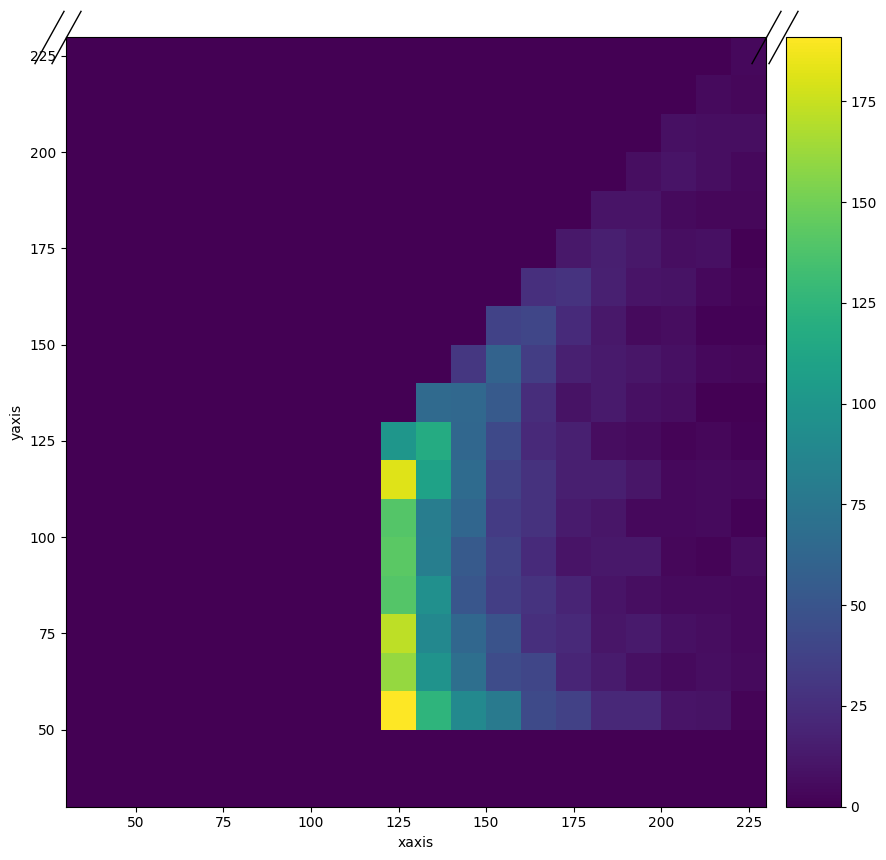

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

#h.project("xaxis").plot(ax=axs[0])
hy = h.project("yaxis")
hx = h.project("xaxis")
h.project("xaxis", "yaxis").plot()
plt.show()

This is not great, but I was unable to figure out how to change the axis labels(!).  Below we will take a projection of the 2D histogram and compare it to the non-conditional histogram "hpt".  They look pretty different.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x156c86190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

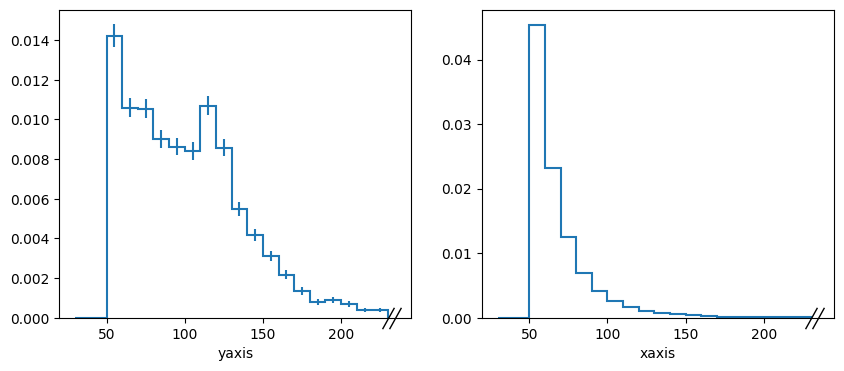

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

hy.plot(ax=axs[0],density=True)
hpt.plot(ax=axs[1],density=True)

---
## <span style="color:Orange">Acknowledgments</span>

* Initial version: Anne Sickles

© Copyright 2023